In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as  mae
from sklearn.metrics import mean_squared_error as mse
from itertools import combinations
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import random
import seaborn as sb
import pickle

In [2]:
data = pd.read_csv(r'data_from_PACIFICA_Database.csv', sep=',')
pacifica = data.replace(-999, np.nan)

In [3]:
pacifica.head(5)

,Cruise:METAVAR:TEXT:21,Station,Type,mon/day/yr,hh:mm,Longitude,Latitude,PRS,DEPTH,TMP,SAL,OXYGEN,PHSPHT,SILCAT,NITRAT,ALKALI,TCARBN,PH
0,09FA20010524,1,B,05/25/2001,NaN,179.95821,-44.429,997.4,986,4.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09FA20010524,1,B,05/25/2001,NaN,179.95821,-44.429,998.3,987,4.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09FA20010524,1,B,05/25/2001,NaN,179.95821,-44.429,998.7,987,4.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09FA20010524,1,B,05/25/2001,NaN,179.95821,-44.429,998.7,987,4.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09FA20010524,1,B,05/25/2001,NaN,179.95821,-44.429,998.7,987,4.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pacifica = pacifica.filter(
items=
['Longitude','Latitude','DEPTH','TMP','OXYGEN', 'TCARBN', 'PHSPHT', 'SILCAT', 'PH'])

In [5]:
pacifica.head(5)

,Longitude,Latitude,DEPTH,TMP,OXYGEN,TCARBN,PHSPHT,SILCAT,PH
0,179.95821,-44.429,986,4.547,NaN,NaN,NaN,NaN,NaN
1,179.95821,-44.429,987,4.533,NaN,NaN,NaN,NaN,NaN
2,179.95821,-44.429,987,4.536,NaN,NaN,NaN,NaN,NaN
3,179.95821,-44.429,987,4.536,NaN,NaN,NaN,NaN,NaN
4,179.95821,-44.429,987,4.536,NaN,NaN,NaN,NaN,NaN


In [6]:
pacifica.shape

(277323, 9)

Supprimer les lignes dans une colonne contient une valeur null

In [7]:
indexRow = pacifica[(pacifica.Longitude.isna()) |(pacifica.Latitude.isna()) |
                    (pacifica.DEPTH.isna()) |(pacifica.TMP.isna()) |(pacifica.OXYGEN.isna()) |
                   (pacifica.TCARBN.isna()) | (pacifica.PHSPHT.isna()) | (pacifica.SILCAT.isna())|
                  (pacifica.PH.isna())].index

# pCO2 = null
print(len(pacifica))
pacifica.drop(indexRow, inplace=True)
print(len(pacifica))
# len(indexRow)

277323
71483


In [8]:
#Sauvegarder la nouvelle dataset dans un fichier csv
pacifica.to_csv('PacificaClean.csv')

Travailer avec la données netoyées

In [9]:
pacifica=pd.read_csv('PacificaClean.csv')

In [10]:
pacifica=pacifica.drop(columns=['Unnamed: 0'])

In [11]:
correlation = pacifica.corr()

<AxesSubplot:>

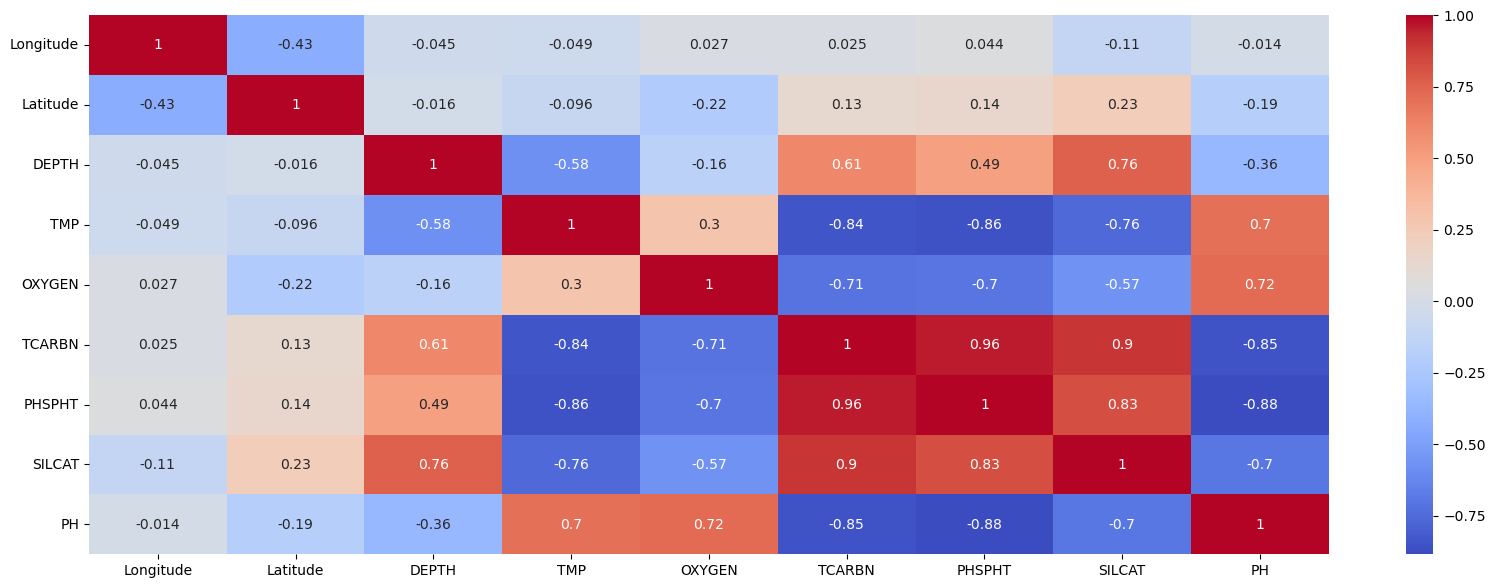

In [12]:
plt.rcParams["figure.figsize"] = (20,7)
sb.heatmap(correlation, annot=True, cmap='coolwarm')

In [13]:
y=pacifica.iloc[:,-1]
X=pacifica.drop(columns=['PH'])

**Entrainement sur tout les variables**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),                  
    keras.layers.Dense(i, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [16]:
score1=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_1couche_'+str(i)+'_neurones',"wb"))
    score1.append(r2_score(y_test,ypred))
    

447/447 [==============================] - 0s 525us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 11:30:44         1769
metadata.json                                  2023-01-23 11:30:44           64
variables.h5                                   2023-01-23 11:30:44        17832
447/447 [==============================] - 0s 525us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...met

config.json                                    2023-01-23 11:47:57         1775
metadata.json                                  2023-01-23 11:47:57           64
variables.h5                                   2023-01-23 11:47:57        17832
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 11:49:42         1775
metadata.json                                  2023-01-23 11:49:42           64
variables.h5                                   2023-01-23 11:49:42   

File Name                                             Modified             Size
config.json                                    2023-01-23 12:07:15         1775
metadata.json                                  2023-01-23 12:07:15           64
variables.h5                                   2023-01-23 12:07:15        17832
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 12:09:02         1775
metadata.json                                  2023-01-23 12:09:02   

In [17]:
k=np.arange(3,100)

In [18]:
max(score1)

0.7502334286928711

In [19]:
print("le mieux nombre de neurone dans la 1er couche est ",np.argmax(score1)+3)

le mieux nombre de neurone dans la 1er couche est  12


**Fixer pour la premiere couche 36 neurones**

In [20]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(i, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [21]:
k=np.arange(3,30)

In [22]:
score2=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_2couche_'+str(i)+'_neurones',"wb"))
    score2.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 525us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 12:17:59         2199
metadata.json                                  2023-01-23 12:17:59           64
variables.h5                                   2023-01-23 12:17:59        20984
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
......

config.json                                    2023-01-23 12:35:03         2200
metadata.json                                  2023-01-23 12:35:03           64
variables.h5                                   2023-01-23 12:35:03        23032
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 12:36:58         2200
metadata.json                                  2023-01-23 12:36:58          

File Name                                             Modified             Size
config.json                                    2023-01-23 12:54:17         2203
metadata.json                                  2023-01-23 12:54:17           64
variables.h5                                   2023-01-23 12:54:17        23032
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 12:56:14         2

In [23]:
np.argmax(score2)+3

10

In [24]:
max(score2)

0.7979355041872958

**fixer la 2 éme couche  à  77   neurones**

In [25]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(i, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [26]:
score3=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_3couche_'+str(i)+'_neurones',"wb"))
    score3.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 13:09:48         2628
metadata.json                                  2023-01-23 13:09:48           64
variables.h5                                   2023-01-23 13:09:48        26688
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 

447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 13:28:10         2629
metadata.json                                  2023-01-23 13:28:10           64
variables.h5                                   2023-01-23 13:28:10        26688
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 

447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 13:46:47         2629
metadata.json                                  2023-01-23 13:46:47           64
variables.h5                                   2023-01-23 13:46:47        26688
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 

In [27]:
np.argmax(score3)+3

28

In [28]:
max(score3)

0.8239167382958128

**fixer la 3éme couche à  69  neurones**

In [29]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(i, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [30]:
score4=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_4couche_'+str(i)+'_neurones',"wb"))
    score4.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 14:05:35         3054
metadata.json                                  2023-01-23 14:05:35           64
variables.h5                                   2023-01-23 14:05:35        32216
447/447 [

File Name                                             Modified             Size
config.json                                    2023-01-23 14:23:02         3055
metadata.json                                  2023-01-23 14:23:02           64
variables.h5                                   2023-01-23 14:23:02        35680
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name

447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 14:42:44         3055
metadata.json                                  2023-01-23 14:42:44           64
variables.h5                                   2023-01-23 14:42:44        36880
447/447 [

File Name                                             Modified             Size
config.json                                    2023-01-23 15:00:17         3056
metadata.json                                  2023-01-23 15:00:17           64
variables.h5                                   2023-01-23 15:00:17        38672
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name

In [31]:
max(score4)

0.8218091515287317

In [32]:
np.argmax(score4)+3

21

**fixer la 4éme couche à  54  neurones**

In [33]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [34]:
score5=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_5couche_'+str(i)+'_neurones',"wb"))
    score5.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 630us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 15:04:45         3481
metadata.json                                  2023-01-23 15:04:45           64
variables.h5  

File Name                                             Modified             Size
config.json                                    2023-01-23 15:20:41         3482
metadata.json                                  2023-01-23 15:20:41           64
variables.h5                                   2023-01-23 15:20:41        42056
447/447 [==============================] - 0s 560us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
...

File Name                                             Modified             Size
config.json                                    2023-01-23 15:39:04         3482
metadata.json                                  2023-01-23 15:39:04           64
variables.h5                                   2023-01-23 15:39:04        44352
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
...

File Name                                             Modified             Size
config.json                                    2023-01-23 15:57:31         3482
metadata.json                                  2023-01-23 15:57:31           64
variables.h5                                   2023-01-23 15:57:31        44624
447/447 [==============================] - 0s 569us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
...

In [35]:
np.argmax(score5)+3

21

In [36]:
max(score5)

0.8344294019953621

**Fixer la 5éme couche à 37 neurones**

In [37]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),

    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [38]:
score6=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_6couche_'+str(i)+'_neurones',"wb"))
    score6.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-23 16:07:06         3907
metadata.json      

File Name                                             Modified             Size
config.json                                    2023-01-23 16:24:15         3908
metadata.json                                  2023-01-23 16:24:15           64
variables.h5                                   2023-01-23 16:24:15        48668
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.......

variables.h5                                   2023-01-23 16:41:30        52132
447/447 [==============================] - 0s 569us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json        

File Name                                             Modified             Size
config.json                                    2023-01-23 17:01:32         3908
metadata.json                                  2023-01-23 17:01:32           64
variables.h5                                   2023-01-23 17:01:32        52856
447/447 [==============================] - 0s 604us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.......

In [39]:
np.argmax(score6)+3

18

In [40]:
max(score6)

0.8409298213457144

**Fixer la 6éme couche à 88 neurones**

In [41]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score6)+3, activation=tf.nn.relu),

    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [42]:
score7=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_7couche_'+str(i)+'_neurones',"wb"))
    score7.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 630us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json             

config.json                                    2023-01-23 17:29:47         4333
metadata.json                                  2023-01-23 17:29:47           64
variables.h5                                   2023-01-23 17:29:47        54824
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15


File Name                                             Modified             Size
config.json                                    2023-01-23 17:47:59         4334
metadata.json                                  2023-01-23 17:47:59           64
variables.h5                                   2023-01-23 17:47:59        58024
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
...

File Name                                             Modified             Size
config.json                                    2023-01-23 18:06:21         4334
metadata.json                                  2023-01-23 18:06:21           64
variables.h5                                   2023-01-23 18:06:21        58528
447/447 [==============================] - 0s 665us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
...

In [43]:
np.argmax(score7)+3

18

In [44]:
max(score7)

0.8441476362643341

**Fixer la 7éme couche à 36 neurones**

In [45]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score6)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score7)+3, activation=tf.nn.relu),


    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [46]:
score8=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_8couche_'+str(i)+'_neurones',"wb"))
    score8.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 630us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                    

File Name                                             Modified             Size
config.json                                    2023-01-23 18:41:21         4767
metadata.json                                  2023-01-23 18:41:21           64
variables.h5                                   2023-01-23 18:41:21        61976
447/447 [==============================] - 0s 595us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........

File Name                                             Modified             Size
config.json                                    2023-01-23 19:00:53         4769
metadata.json                                  2023-01-23 19:00:53           64
variables.h5                                   2023-01-23 19:00:53        65176
447/447 [==============================] - 0s 639us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........

File Name                                             Modified             Size
config.json                                    2023-01-23 19:20:32         4769
metadata.json                                  2023-01-23 19:20:32           64
variables.h5                                   2023-01-23 19:20:32        65680
447/447 [==============================] - 0s 604us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........

In [47]:
max(score8)

0.851178205816836

In [48]:
np.argmax(score8)+3

19

**Fixer la 8éme couche à 91 neurones**

In [49]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score6)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score7)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score8)+3, activation=tf.nn.relu),


    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [50]:
score9=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_9couche_'+str(i)+'_neurones',"wb"))
    score9.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 604us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.

447/447 [==============================] - 0s 639us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.

447/447 [==============================] - 0s 674us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.

447/447 [==============================] - 0s 674us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.

447/447 [==============================] - 0s 674us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.

In [51]:
np.argmax(score9)+3

25

In [52]:
max(score9)

0.8545429115758552

**fixer la 9émé couche à 37 neurones**

In [53]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score6)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score7)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score8)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score9)+3, activation=tf.nn.relu),

    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [54]:
score10=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_10couche_'+str(i)+'_neurones',"wb"))
    score10.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 674us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
...

File Name                                             Modified             Size
config.json                                    2023-01-23 21:23:04         5622
metadata.json                                  2023-01-23 21:23:04           64
variables.h5                                   2023-01-23 21:23:04        76480
447/447 [==============================] - 0s 665us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
........

File Name                                             Modified             Size
config.json                                    2023-01-23 21:43:07         5623
metadata.json                                  2023-01-23 21:43:07           64
variables.h5                                   2023-01-23 21:43:07        79780
447/447 [==============================] - 0s 701us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
........

File Name                                             Modified             Size
config.json                                    2023-01-23 22:03:45         5623
metadata.json                                  2023-01-23 22:03:45           64
variables.h5                                   2023-01-23 22:03:45        80380
447/447 [==============================] - 0s 700us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
........

File Name                                             Modified             Size
config.json                                    2023-01-23 22:24:24         5623
metadata.json                                  2023-01-23 22:24:24           64
variables.h5                                   2023-01-23 22:24:24        81532
447/447 [==============================] - 0s 633us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
........

In [55]:
np.argmax(score10)+3

7

In [56]:
max(score10)

0.853824316151804

**fixer la 10émé couche à 84 neurones**

In [57]:
def build_model(Xtrain,i):
    model = keras.Sequential([
    keras.layers.Input(shape=(Xtrain.shape[1],)),  
    keras.layers.Dense(np.argmax(score1)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score2)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score3)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score4)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score5)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score6)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score7)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score8)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score9)+3, activation=tf.nn.relu),
    keras.layers.Dense(np.argmax(score10)+3, activation=tf.nn.relu),

    keras.layers.Dense(i, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ], name="MLP_model")

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

EPOCHS = 100

In [58]:
score11=[]
for i in range(3,30):
    model = build_model(X_train,i)
    model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0)
    ypred=model.predict(X_test)
    # Save the model to a file
    pickle.dump(model,open('Ann_11couche_'+str(i)+'_neurones',"wb"))
    score11.append(r2_score(y_test,ypred))

447/447 [==============================] - 0s 735us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........1

File Name                                             Modified             Size
config.json                                    2023-01-23 22:56:24         6048
metadata.json                                  2023-01-23 22:56:24           64
variables.h5                                   2023-01-23 22:56:24        79632
447/447 [==============================] - 0s 701us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.......

File Name                                             Modified             Size
config.json                                    2023-01-23 23:18:49         6049
metadata.json                                  2023-01-23 23:18:49           64
variables.h5                                   2023-01-23 23:18:49        79632
447/447 [==============================] - 0s 665us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.......

File Name                                             Modified             Size
config.json                                    2023-01-23 23:41:33         6049
metadata.json                                  2023-01-23 23:41:33           64
variables.h5                                   2023-01-23 23:41:33        80044
447/447 [==============================] - 0s 735us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.......

Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-24 00:04:29         6049
metadata.json                                  2023-01-24 00:04:29           64
variables.h5                                   2023-01-24 00:04:29        80212
447/447 [==============================] - 0s 735us/step
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
.

In [59]:
max(score11)

0.8516409257409956

In [60]:
scores=[max(score1),max(score2),max(score3),max(score4),max(score5),max(score6),max(score7),max(score8),max(score9),max(score10),max(score11)]

In [61]:
a=np.arange(1,12)

Text(0.5, 0, 'Hidden layers')

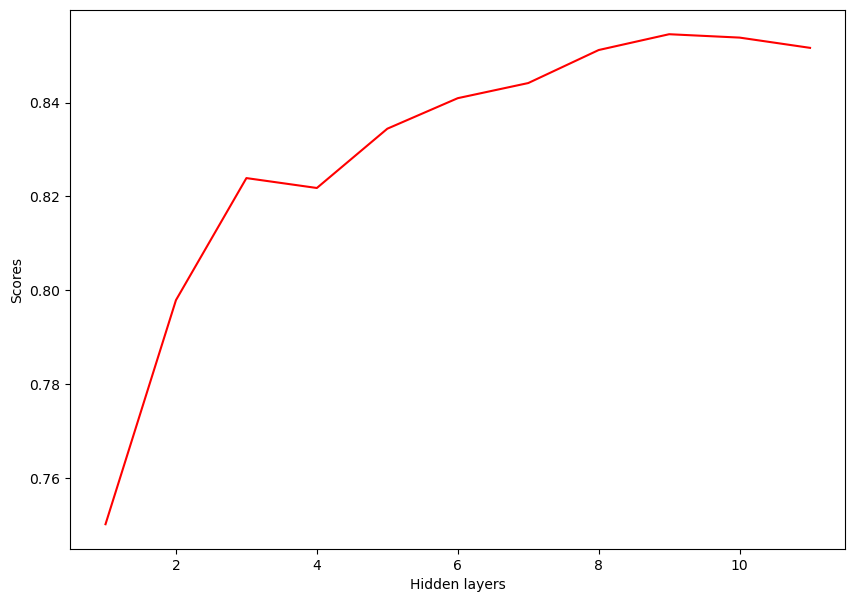

In [62]:
plt.rcParams["figure.figsize"] = (10,7)

fig, ax = plt.subplots()
ax.plot( a,scores,c='Red')

ax.set_ylabel('Scores')
ax.set_xlabel('Hidden layers')